In [ ]:
!pip install transformers
!pip install xformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
df = pd.read_csv('data_lyrics.csv')
df.head()

,numCharts,Unnamed: 0,id,track,artist,lyrics,lyrics_translated,language,genres,genre,...,emot_anger,emot_trust,emot_disgust,emot_fear,emot_joy,emot_surprise,emot_anticp,image,song_url,artist_url
0,1,0,26cvTWJq2E1QqN4jyH2OTU,Tak Segampang Itu,Anggi Marito,"Waktu demi waktu, hari demi hari \n Sadar ku t...","Time after time, day after day\n I realized my...",id,['indonesian pop'],pop,...,0.000000,0.037037,0.000000,0.037037,0.259259,0.074074,0.0,https://i.scdn.co/image/ab6761610000e5eb604493...,https://open.spotify.com/track/26cvTWJq2E1QqN4...,https://open.spotify.com/artist/1JvbNeV9zG9Sew...
1,2,1,2AaaE0qvFWtyT8srKNfRhH,Komang,Raim Laode,"Dari kejauhan, tergambar cerita tentang kita \...","From a distance, a story about us\n Separate d...",id,[],other,...,0.018519,0.111111,0.000000,0.000000,0.277778,0.055556,0.0,https://i.scdn.co/image/ab6761610000e5eb8f5fe3...,https://open.spotify.com/track/2AaaE0qvFWtyT8s...,https://open.spotify.com/artist/5LcNPa8f8bRmZq...
2,3,2,6dXiWwFrcGieqnoLYzPNp5,Sial,Mahalini,Sampai saat ini tak terpikir olehku \n Aku per...,Until now I didn't think of me\n I once gave a...,id,['indonesian pop'],pop,...,0.071429,0.091837,0.040816,0.102041,0.183673,0.051020,0.0,https://i.scdn.co/image/ab6761610000e5ebb83334...,https://open.spotify.com/track/6dXiWwFrcGieqno...,https://open.spotify.com/artist/3wOsYKZM0zcKNa...
3,4,3,1daDRI9ahBonbWD8YcxOIB,Angels Like You,Miley Cyrus,"Mmm, mmm, mmm \n \n Flowers in hand, waiting ...","Mmm, mmm, mmm \n \n Flowers in hand, waiting ...",en,['pop'],pop,...,0.082474,0.041237,0.072165,0.123711,0.051546,0.030928,0.0,https://i.scdn.co/image/ab6761610000e5eb7e8110...,https://open.spotify.com/track/1daDRI9ahBonbWD...,https://open.spotify.com/artist/5YGY8feqx7naU7...
4,5,4,5BKJAuVMDyrFvUTo4dIaiK,Not You,Alan Walker,"In my life, in my mind \n Where I make up stor...","In my life, in my mind \n Where I make up stor...",en,['electro house'],other,...,0.038462,0.115385,0.038462,0.115385,0.115385,0.038462,0.0,https://i.scdn.co/image/ab6761610000e5ebbf753c...,https://open.spotify.com/track/5BKJAuVMDyrFvUT...,https://open.spotify.com/artist/7vk5e3vY1uw9pl...


In [ ]:
example = df['lyrics'][4]
print(example)

In my life, in my mind 
 Where I make up stories all the time 
 And I pretend that I am not someone 
 Left to face the world alone 
 Lately I'm not the same 
 I've found a stranger calling out my name 
 Have a feeling you would be so proud 
 And he's gon' need me now 
 But he's not you 
 He's not you 
 He will never be you 
 Photobook with my mistakes 
 Promises that we never got to make 
 All the things I wanna talk about 
 Hard to say it to myself 
 Wintertime, once again 
 In the snow I can see just where I've been 
 How far I've made it in the world so cold 
 Where I have everything 
 But he's not you 
 He's not you 
 He will never be you 
 But he's not you 
 He's not you 
 He will never be you 
 


In [ ]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['In', 'my', 'life', ',', 'in', 'my', 'mind', 'Where', 'I', 'make']

In [ ]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('In', 'IN'),
 ('my', 'PRP$'),
 ('life', 'NN'),
 (',', ','),
 ('in', 'IN'),
 ('my', 'PRP$'),
 ('mind', 'NN'),
 ('Where', 'WRB'),
 ('I', 'PRP'),
 ('make', 'VBP')]

In [ ]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  In/IN
  my/PRP$
  life/NN
  ,/,
  in/IN
  my/PRP$
  mind/NN
  Where/WRB
  I/PRP
  make/VBP
  up/RP
  stories/NNS
  all/PDT
  the/DT
  time/NN
  And/CC
  I/PRP
  pretend/VBP
  that/IN
  I/PRP
  am/VBP
  not/RB
  someone/NN
  Left/VBD
  to/TO
  face/VB
  the/DT
  world/NN
  alone/RB
  Lately/RB
  I/PRP
  'm/VBP
  not/RB
  the/DT
  same/JJ
  I/PRP
  've/VBP
  found/VBN
  a/DT
  stranger/NN
  calling/VBG
  out/RP
  my/PRP$
  name/NN
  Have/VBP
  a/DT
  feeling/NN
  you/PRP
  would/MD
  be/VB
  so/RB
  proud/JJ
  And/CC
  he/PRP
  's/VBZ
  gon/NN
  '/''
  need/VB
  me/PRP
  now/RB
  But/CC
  he/PRP
  's/VBZ
  not/RB
  you/PRP
  He/PRP
  's/VBZ
  not/RB
  you/PRP
  He/PRP
  will/MD
  never/RB
  be/VB
  you/PRP
  Photobook/VB
  with/IN
  my/PRP$
  mistakes/NNS
  Promises/VBZ
  that/IN
  we/PRP
  never/RB
  got/VBD
  to/TO
  make/VB
  All/PDT
  the/DT
  things/NNS
  I/PRP
  wan/VBP
  na/JJ
  talk/NN
  about/IN
  (PERSON Hard/NNP)
  to/TO
  say/VB
  it/PRP
  to/TO
  myself/VB
  Wintertime/

# Langkah 1: VADER Sentiment Scoring

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [ ]:
sia.polarity_scores('I am so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [ ]:
sia.polarity_scores('How dare you!')

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [ ]:
sia.polarity_scores(example)

{'neg': 0.053, 'neu': 0.896, 'pos': 0.05, 'compound': 0.152}

In [ ]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
  text = row['lyrics_translated']
  myid = row['numCharts']
  res[myid] = sia.polarity_scores(text)

  0%|          | 0/50 [00:00<?, ?it/s]

In [ ]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'numCharts'})
vaders = vaders.merge(df, how='left')

In [ ]:
vaders.head()

,numCharts,neg,neu,pos,compound,Unnamed: 0,id,track,artist,lyrics,...,emot_anger,emot_trust,emot_disgust,emot_fear,emot_joy,emot_surprise,emot_anticp,image,song_url,artist_url
0,1,0.077,0.715,0.209,0.9835,0,26cvTWJq2E1QqN4jyH2OTU,Tak Segampang Itu,Anggi Marito,"Waktu demi waktu, hari demi hari \n Sadar ku t...",...,0.000000,0.037037,0.000000,0.037037,0.259259,0.074074,0.0,https://i.scdn.co/image/ab6761610000e5eb604493...,https://open.spotify.com/track/26cvTWJq2E1QqN4...,https://open.spotify.com/artist/1JvbNeV9zG9Sew...
1,2,0.036,0.614,0.350,0.9963,1,2AaaE0qvFWtyT8srKNfRhH,Komang,Raim Laode,"Dari kejauhan, tergambar cerita tentang kita \...",...,0.018519,0.111111,0.000000,0.000000,0.277778,0.055556,0.0,https://i.scdn.co/image/ab6761610000e5eb8f5fe3...,https://open.spotify.com/track/2AaaE0qvFWtyT8s...,https://open.spotify.com/artist/5LcNPa8f8bRmZq...
2,3,0.254,0.661,0.086,-0.9912,2,6dXiWwFrcGieqnoLYzPNp5,Sial,Mahalini,Sampai saat ini tak terpikir olehku \n Aku per...,...,0.071429,0.091837,0.040816,0.102041,0.183673,0.051020,0.0,https://i.scdn.co/image/ab6761610000e5ebb83334...,https://open.spotify.com/track/6dXiWwFrcGieqno...,https://open.spotify.com/artist/3wOsYKZM0zcKNa...
3,4,0.084,0.664,0.253,0.9954,3,1daDRI9ahBonbWD8YcxOIB,Angels Like You,Miley Cyrus,"Mmm, mmm, mmm \n \n Flowers in hand, waiting ...",...,0.082474,0.041237,0.072165,0.123711,0.051546,0.030928,0.0,https://i.scdn.co/image/ab6761610000e5eb7e8110...,https://open.spotify.com/track/1daDRI9ahBonbWD...,https://open.spotify.com/artist/5YGY8feqx7naU7...
4,5,0.053,0.896,0.050,0.1520,4,5BKJAuVMDyrFvUTo4dIaiK,Not You,Alan Walker,"In my life, in my mind \n Where I make up stor...",...,0.038462,0.115385,0.038462,0.115385,0.115385,0.038462,0.0,https://i.scdn.co/image/ab6761610000e5ebbf753c...,https://open.spotify.com/track/5BKJAuVMDyrFvUT...,https://open.spotify.com/artist/7vk5e3vY1uw9pl...


## Hasil Vader

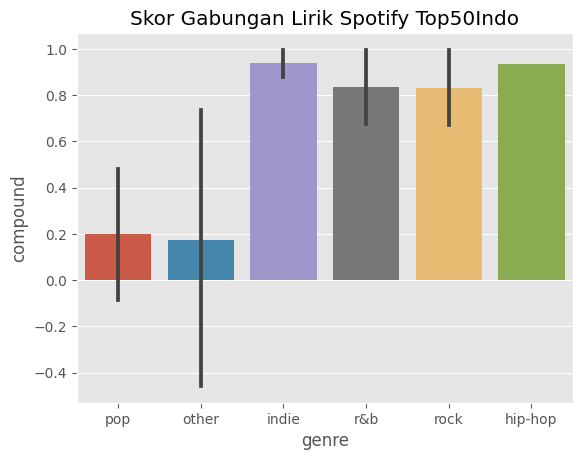

In [ ]:
ax = sns.barplot(data=vaders, x='genre', y='compound')
ax.set_title('Skor Gabungan Lirik Spotify Top50Indo')
plt.show()

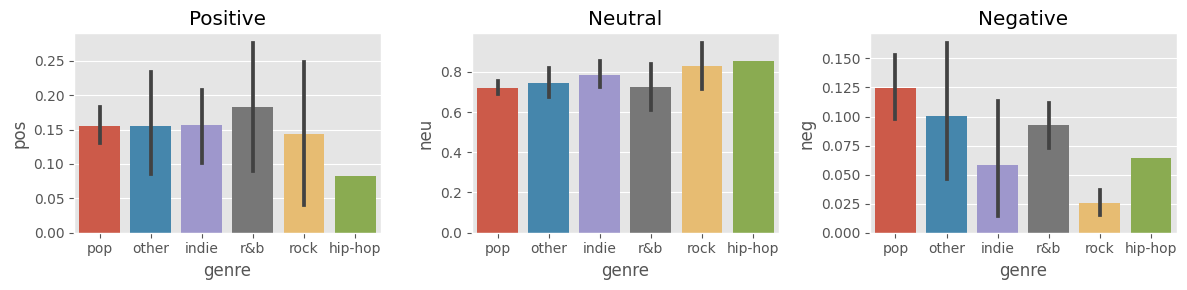

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='genre', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='genre', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='genre', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

In [ ]:
df = vaders.to_csv('data_lyrics_vader.csv')

# Langkah 2: Membuat Model Pretrained Roberta

In [ ]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [ ]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [ ]:
print(example)
sia.polarity_scores(example)

In my life, in my mind 
 Where I make up stories all the time 
 And I pretend that I am not someone 
 Left to face the world alone 
 Lately I'm not the same 
 I've found a stranger calling out my name 
 Have a feeling you would be so proud 
 And he's gon' need me now 
 But he's not you 
 He's not you 
 He will never be you 
 Photobook with my mistakes 
 Promises that we never got to make 
 All the things I wanna talk about 
 Hard to say it to myself 
 Wintertime, once again 
 In the snow I can see just where I've been 
 How far I've made it in the world so cold 
 Where I have everything 
 But he's not you 
 He's not you 
 He will never be you 
 But he's not you 
 He's not you 
 He will never be you 
 


{'neg': 0.053, 'neu': 0.896, 'pos': 0.05, 'compound': 0.152}

In [ ]:
# Run for Roberta Model
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.4145894, 'roberta_neu': 0.4555262, 'roberta_pos': 0.1298844}


In [ ]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [ ]:
df = pd.read_csv('data_lyrics.csv')
df.head()

,numCharts,Unnamed: 0,id,track,artist,lyrics,lyrics_translated,language,genres,genre,...,emot_anger,emot_trust,emot_disgust,emot_fear,emot_joy,emot_surprise,emot_anticp,image,song_url,artist_url
0,1,0,26cvTWJq2E1QqN4jyH2OTU,Tak Segampang Itu,Anggi Marito,"Waktu demi waktu, hari demi hari \n Sadar ku t...","Time after time, day after day\n I realized my...",id,['indonesian pop'],pop,...,0.000000,0.037037,0.000000,0.037037,0.259259,0.074074,0.0,https://i.scdn.co/image/ab6761610000e5eb604493...,https://open.spotify.com/track/26cvTWJq2E1QqN4...,https://open.spotify.com/artist/1JvbNeV9zG9Sew...
1,2,1,2AaaE0qvFWtyT8srKNfRhH,Komang,Raim Laode,"Dari kejauhan, tergambar cerita tentang kita \...","From a distance, a story about us\n Separate d...",id,[],other,...,0.018519,0.111111,0.000000,0.000000,0.277778,0.055556,0.0,https://i.scdn.co/image/ab6761610000e5eb8f5fe3...,https://open.spotify.com/track/2AaaE0qvFWtyT8s...,https://open.spotify.com/artist/5LcNPa8f8bRmZq...
2,3,2,6dXiWwFrcGieqnoLYzPNp5,Sial,Mahalini,Sampai saat ini tak terpikir olehku \n Aku per...,Until now I didn't think of me\n I once gave a...,id,['indonesian pop'],pop,...,0.071429,0.091837,0.040816,0.102041,0.183673,0.051020,0.0,https://i.scdn.co/image/ab6761610000e5ebb83334...,https://open.spotify.com/track/6dXiWwFrcGieqno...,https://open.spotify.com/artist/3wOsYKZM0zcKNa...
3,4,3,1daDRI9ahBonbWD8YcxOIB,Angels Like You,Miley Cyrus,"Mmm, mmm, mmm \n \n Flowers in hand, waiting ...","Mmm, mmm, mmm \n \n Flowers in hand, waiting ...",en,['pop'],pop,...,0.082474,0.041237,0.072165,0.123711,0.051546,0.030928,0.0,https://i.scdn.co/image/ab6761610000e5eb7e8110...,https://open.spotify.com/track/1daDRI9ahBonbWD...,https://open.spotify.com/artist/5YGY8feqx7naU7...
4,5,4,5BKJAuVMDyrFvUTo4dIaiK,Not You,Alan Walker,"In my life, in my mind \n Where I make up stor...","In my life, in my mind \n Where I make up stor...",en,['electro house'],other,...,0.038462,0.115385,0.038462,0.115385,0.115385,0.038462,0.0,https://i.scdn.co/image/ab6761610000e5ebbf753c...,https://open.spotify.com/track/5BKJAuVMDyrFvUT...,https://open.spotify.com/artist/7vk5e3vY1uw9pl...


In [ ]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['cleaned_lyrics_translated']
        myid = row['numCharts']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')

  0%|          | 0/50 [00:00<?, ?it/s]

Broke for id 6
Broke for id 16
Broke for id 21
Broke for id 42
Broke for id 44
Broke for id 47
Broke for id 48


In [ ]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'numCharts'})
results_df = results_df.merge(df, how='left')

In [ ]:
results_df.head()

,numCharts,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,Unnamed: 0,id,...,emot_anger,emot_trust,emot_disgust,emot_fear,emot_joy,emot_surprise,emot_anticp,image,song_url,artist_url
0,1,0.077,0.715,0.209,0.9835,0.247859,0.531615,0.220526,0,26cvTWJq2E1QqN4jyH2OTU,...,0.000000,0.037037,0.000000,0.037037,0.259259,0.074074,0.0,https://i.scdn.co/image/ab6761610000e5eb604493...,https://open.spotify.com/track/26cvTWJq2E1QqN4...,https://open.spotify.com/artist/1JvbNeV9zG9Sew...
1,2,0.036,0.614,0.350,0.9963,0.066434,0.280478,0.653089,1,2AaaE0qvFWtyT8srKNfRhH,...,0.018519,0.111111,0.000000,0.000000,0.277778,0.055556,0.0,https://i.scdn.co/image/ab6761610000e5eb8f5fe3...,https://open.spotify.com/track/2AaaE0qvFWtyT8s...,https://open.spotify.com/artist/5LcNPa8f8bRmZq...
2,3,0.254,0.661,0.086,-0.9912,0.576483,0.355801,0.067716,2,6dXiWwFrcGieqnoLYzPNp5,...,0.071429,0.091837,0.040816,0.102041,0.183673,0.051020,0.0,https://i.scdn.co/image/ab6761610000e5ebb83334...,https://open.spotify.com/track/6dXiWwFrcGieqno...,https://open.spotify.com/artist/3wOsYKZM0zcKNa...
3,4,0.084,0.664,0.253,0.9954,0.471627,0.418479,0.109894,3,1daDRI9ahBonbWD8YcxOIB,...,0.082474,0.041237,0.072165,0.123711,0.051546,0.030928,0.0,https://i.scdn.co/image/ab6761610000e5eb7e8110...,https://open.spotify.com/track/1daDRI9ahBonbWD...,https://open.spotify.com/artist/5YGY8feqx7naU7...
4,5,0.053,0.896,0.050,0.1520,0.414589,0.455526,0.129884,4,5BKJAuVMDyrFvUTo4dIaiK,...,0.038462,0.115385,0.038462,0.115385,0.115385,0.038462,0.0,https://i.scdn.co/image/ab6761610000e5ebbf753c...,https://open.spotify.com/track/5BKJAuVMDyrFvUT...,https://open.spotify.com/artist/7vk5e3vY1uw9pl...


# Langkah 3: Gabungkan dan Bandingkan

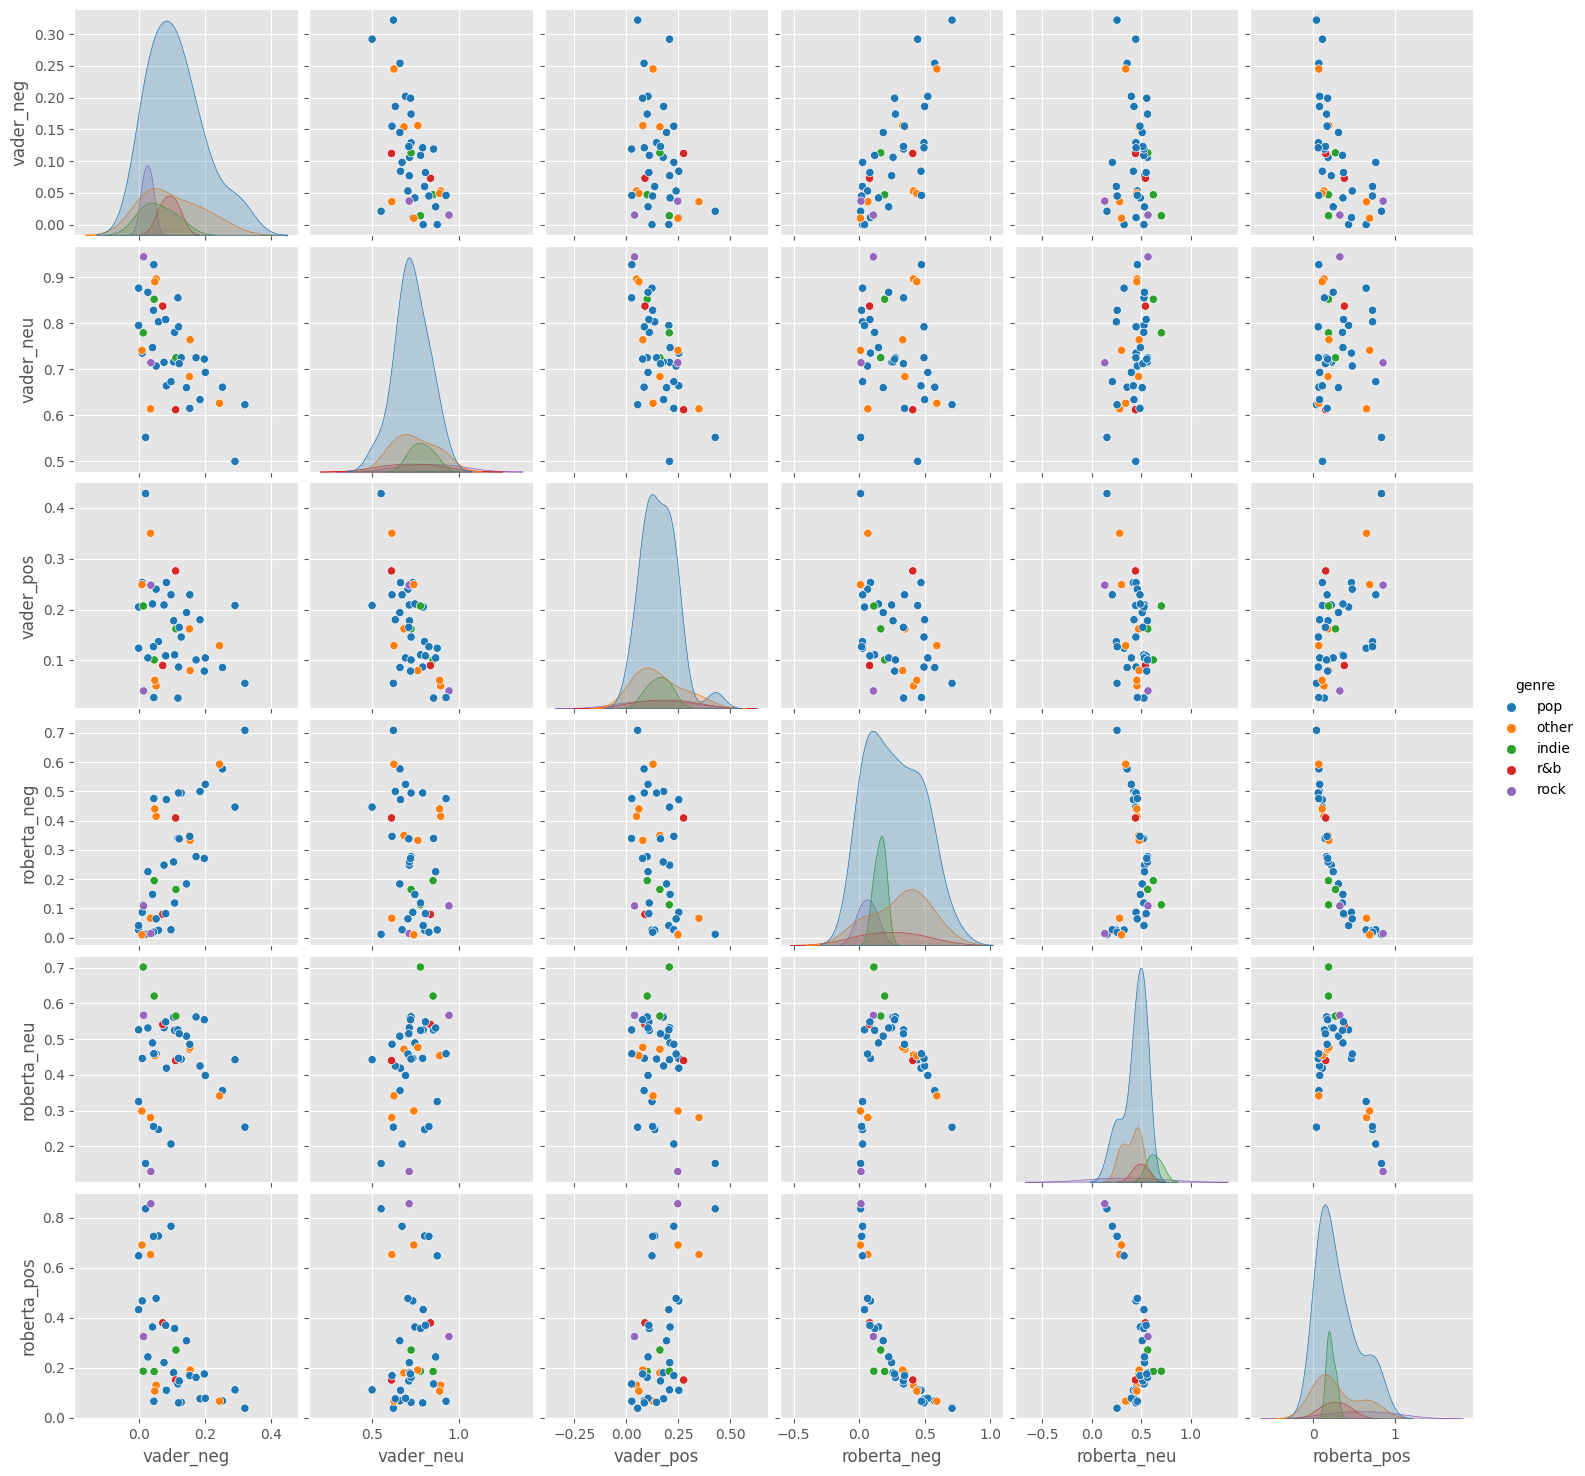

In [ ]:
sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='genre',
            palette='tab10')
plt.show()

# Langkah 4: Contoh Lirik

In [ ]:
# Lirik paling positif menurut Roberta
results_df.sort_values('roberta_pos', ascending=False)['lyrics'].values[0]

"Kau begitu sempurna \n Dimataku kau begitu indah \n Kau membuat diriku akan s'lalu memujamu \n ♪ \n Disetiap langkahku \n Kukan s'lalu memikirkan dirimu \n Tak bisa kubayangkan hidupku tanpa cintamu \n ♪ \n Janganlah kau tinggalkan diriku \n Takkan mampu menghadapi semuaa \n Hanya bersamamu ku akan bisa \n Kau adalah darahku \n Kau adalah jantungku \n Kau adalah hidupku \n Lengkapi diriku \n Oh sayangku, kau begitu \n  \n Sempurna, Sempurna... \n Kau genggam tanganku \n Saat diriku lemah dan terjatuh \n Kau bisikkan kata dan hapus semua sesalku \n ♪ \n Janganlah kau tinggalkan diriku \n Takkan mampu menghadapi semua \n Hanya bersamamu ku akan bisa \n Kau adalah darahku \n Kau adalah jantungku \n Kau adalah hidupku \n Lengkapi diriku \n Oh sayangku, kau begitu \n ♪ \n Sempurna, Sempurna... \n ♪ \n Janganlah kau tinggalkan diriku \n Takkan mampu menghadapi semua \n Hanya bersamamu ku akan bisa \n Kau adalah darahku \n Kau adalah jantungku \n Kau adalah hidupku \n Lengkapi diriku \n Oh s

In [ ]:
# Lirik paling positif menurut VADER
results_df.sort_values('vader_pos', ascending=False)['lyrics'].values[0]

"Tergetar aku tepat di hadapanmu \n Debar jantungku berdetak saat kugenggam tanganmu \n Beruntung aku kini dapatkan cintamu \n Yang tercantik di hatiku sejak awal ku bertemu \n Janji padaku, jangan kau lukai hati \n Seperti kisah yang lalu \n Kau bukan cinta pertamaku \n Namun aku berharap \n Mulai hari ini, saat ini \n Engkau cintanya aku \n Yang kurasakan denganmu semua berbeda \n Kekasih yang baik hati kini ada di sampingku \n Janji padaku, jangan ada lagi \n Hati yang lain selain aku (o-oh) \n Kau bukan cinta pertamaku \n Namun aku berharap \n Mulai hari ini, saat ini \n Engkau cintanya aku \n  \n Jangan pernah ragukan kesetiaan hatiku (ho-oh) \n Ku tak inginkan bila ini terbagi \n Cinta, hu-woo \n ♪ \n Engkau cintanya aku \n Kau bukan cinta pertamaku (o-oh) \n Namun aku berharap \n Mulai hari ini, saat ini \n Engkau cintanya aku \n Kau bukan cinta pertamaku \n Namun aku berharap \n Mulai hari ini, saat ini \n Engkau cintanya aku \n Mulai hari ini, saat ini \n Engkau cintanya aku \

In [ ]:
# Lirik paling negatif menurut Roberta
results_df.sort_values('roberta_neg', ascending=False)['lyrics'].values[0]

'Oh-oh-oh-oh \n Sudah kucoba sepenuh hati \n Untuk menjadi malaikat \n Menepikan perasaan, runtuhkan egoku \n Namun, sayapku remuk \n Bila kutanya pada diriku \n Mengapa aku bertahan? \n Menerima keadaan yang tak baik saja \n Memaksakan segalanya \n Sakit, tak sanggup \n Sadarkah kita terlalu hancur? \n Hilang, habis tak bersisa \n Tapi tak mampu ku menyerah \n Tertawan hati \n (Ho-oh) ho-oh-uh-oh \n Tak mau kehilangan, tapi lelah berjuang \n Bukankah rumah tempatku bersandar? \n Sendiri ku tak bisa, bersama ku tersiksa \n Ini kenyataannya, kita tak baik saja \n Sakit, tak sanggup \n Sadarkah kita terlalu hancur? \n Hilang, habis tak bersisa \n Tapi tak mampu ku menyerah \n Tertawan hati \n (Sakit, tak sanggup) ho-oh-oh \n (Sadarkah) ho-oh, kita terlalu hancur? \n Hilang, habis tak bersisa \n Tapi tak mampu ku menyerah, ho-oh-oh \n Tak mampu ku menyerah \n Tertawan hati \n He-hm-mm \n '

In [ ]:
# Lirik paling negatif menurut VADER
results_df.sort_values('vader_neg', ascending=False)['lyrics'].values[0]

'Oh-oh-oh-oh \n Sudah kucoba sepenuh hati \n Untuk menjadi malaikat \n Menepikan perasaan, runtuhkan egoku \n Namun, sayapku remuk \n Bila kutanya pada diriku \n Mengapa aku bertahan? \n Menerima keadaan yang tak baik saja \n Memaksakan segalanya \n Sakit, tak sanggup \n Sadarkah kita terlalu hancur? \n Hilang, habis tak bersisa \n Tapi tak mampu ku menyerah \n Tertawan hati \n (Ho-oh) ho-oh-uh-oh \n Tak mau kehilangan, tapi lelah berjuang \n Bukankah rumah tempatku bersandar? \n Sendiri ku tak bisa, bersama ku tersiksa \n Ini kenyataannya, kita tak baik saja \n Sakit, tak sanggup \n Sadarkah kita terlalu hancur? \n Hilang, habis tak bersisa \n Tapi tak mampu ku menyerah \n Tertawan hati \n (Sakit, tak sanggup) ho-oh-oh \n (Sadarkah) ho-oh, kita terlalu hancur? \n Hilang, habis tak bersisa \n Tapi tak mampu ku menyerah, ho-oh-oh \n Tak mampu ku menyerah \n Tertawan hati \n He-hm-mm \n '

In [ ]:
from transformers import pipeline

sent_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [ ]:
sent_pipeline('Keep that breathless charm')

[{'label': 'POSITIVE', 'score': 0.9998866319656372}]

In [ ]:
sent_pipeline('Aku ingin mencintaimu selamanya')

[{'label': 'NEGATIVE', 'score': 0.7308292984962463}]

In [ ]:
sent_pipeline('Je fois la vie en rose')

[{'label': 'POSITIVE', 'score': 0.9868125319480896}]

In [ ]:
sent_pipeline('Adorarte para mi fue religion')

[{'label': 'POSITIVE', 'score': 0.9823036789894104}]

In [ ]:
sent_pipeline('Aku cinta padamu')

[{'label': 'NEGATIVE', 'score': 0.5616573691368103}]

In [ ]:
results_df.to_csv('data_lyrics_roberta.csv')